# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

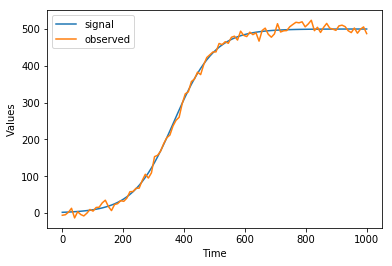

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedSampling(log_likelihood, log_prior)

# Set dynamic enlargement factor
sampler._sampler.set_dynamic_enlargement_factor(True)

# Set sampler marginal likelihood threshold
sampler.set_marginal_log_likelihood_threshold(0.005)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested Ellipsoidal Rejection sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.0 -inf          1             
0     2       0:00.0 -inf          1             
0     3       0:00.0 -inf          1             
0     4       0:00.0 -inf          1             
0     5       0:00.0 -inf          1             
0     21      0:00.0 -inf          1             
0     41      0:00.0 -inf          1             
0     61      0:00.0 -inf          1             
0     81      0:00.0 -inf          1             
0     101     0:00.0 -inf          1             
0     121     0:00.0 -inf          1             
0     141     0:00.0 -inf          1             
0     161     0:00.0 -inf          1             
0     181     0:00.0 -inf          1             
0     201     0:00.0 -inf          1             
0     221     0:00.0 -inf          1             
0  

pints/_log_likelihoods.py:155: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1640  1662    0:01.5 -159.5291597  0.495805034   
1660  1693    0:01.6 -154.0751398  0.493735317   
1680  1707    0:01.6 -149.1894339  0.494976816   
1700  1735    0:01.6 -143.323682   0.493550835   
1720  1743    0:01.6 -137.8188171  0.495870871   
1740  1758    0:01.7 -132.8851141  0.496850685   
1760  1776    0:01.7 -129.0027683  0.497259773   
1780  1823    0:01.7 -123.3557768  0.492510699   
1800  1843    0:01.8 -119.6770623  0.492616034   
1820  1860    0:01.8 -116.3505662  0.493231517   
1840  1872    0:01.8 -112.4863849  0.494679025   
1860  1898    0:01.8 -109.103526   0.493747888   
1880  1923    0:01.9 -105.7880171  0.493009321   
1900  1946    0:01.9 -103.1928497  0.492615688   
1920  1958    0:01.9 -100.5269592  0.493991556   
1940  1977    0:01.9 -98.52036016  0.494227069   
1960  1989    0:01.9 -96.94894496  0.495555556   
1980  2001    0:02.0 -95.23957915  0.496857322   
2000  2015    0:02.0 -93.60992479  0.497823383   
2020  2025    0:02.0 -92.00681273  0.499383857   


5000  3121    0:05.2 -1.839459643  0.628380224   
5020  3123    0:05.2 -1.75850197   0.629221133   
5040  3126    0:05.3 -1.711816917  0.629971495   
5060  3136    0:05.3 -1.635609205  0.630120319   
5080  3143    0:05.3 -1.562253446  0.630522629   
5100  3152    0:05.3 -1.494340001  0.630752717   
5120  3156    0:05.3 -1.425557148  0.631402969   
5140  3166    0:05.4 -1.359154351  0.631543892   
5160  3172    0:05.4 -1.295414759  0.632019116   
5180  3180    0:05.4 -1.234394243  0.632323767   
5200  3182    0:05.4 -1.175617671  0.633126731   
5220  3186    0:05.5 -1.119091788  0.63375838    
5240  3197    0:05.5 -1.064995409  0.633804660906
5260  3205    0:05.5 -1.013158666  0.634098617   
5280  3210    0:05.5 -0.963494     0.634637888441
5300  3221    0:05.5 -0.916085     0.634680135   
5320  3225    0:05.6 -0.870676     0.635295636   
5340  3233    0:05.6 -0.827355     0.635580139   
5360  3240    0:05.6 -0.785954     0.63594411    
5380  3244    0:05.6 -0.746456     0.636549521   


## Plot posterior samples versus true parameter values (dashed lines)

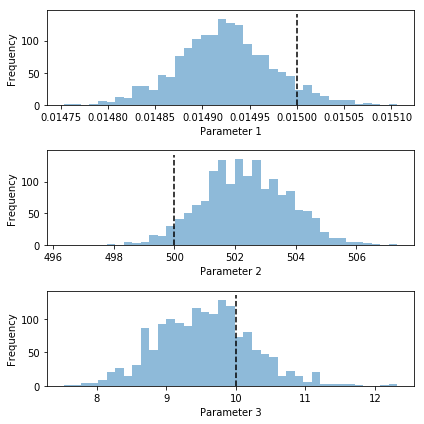

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

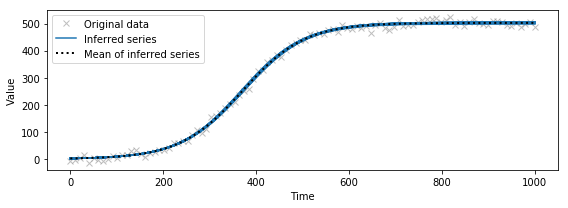

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -377.714955759 ± 0.0793391932221


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1554.98393632
